In [10]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

line = np.array(pd.read_csv("moa_2009_groundingline_v1.1.txt", sep='\t'))
print(line)

[[260.642  -75.1044]
 [260.642  -75.1041]
 [260.642  -75.1037]
 ...
 [260.651  -75.1069]
 [260.65   -75.1069]
 [260.643  -75.1046]]


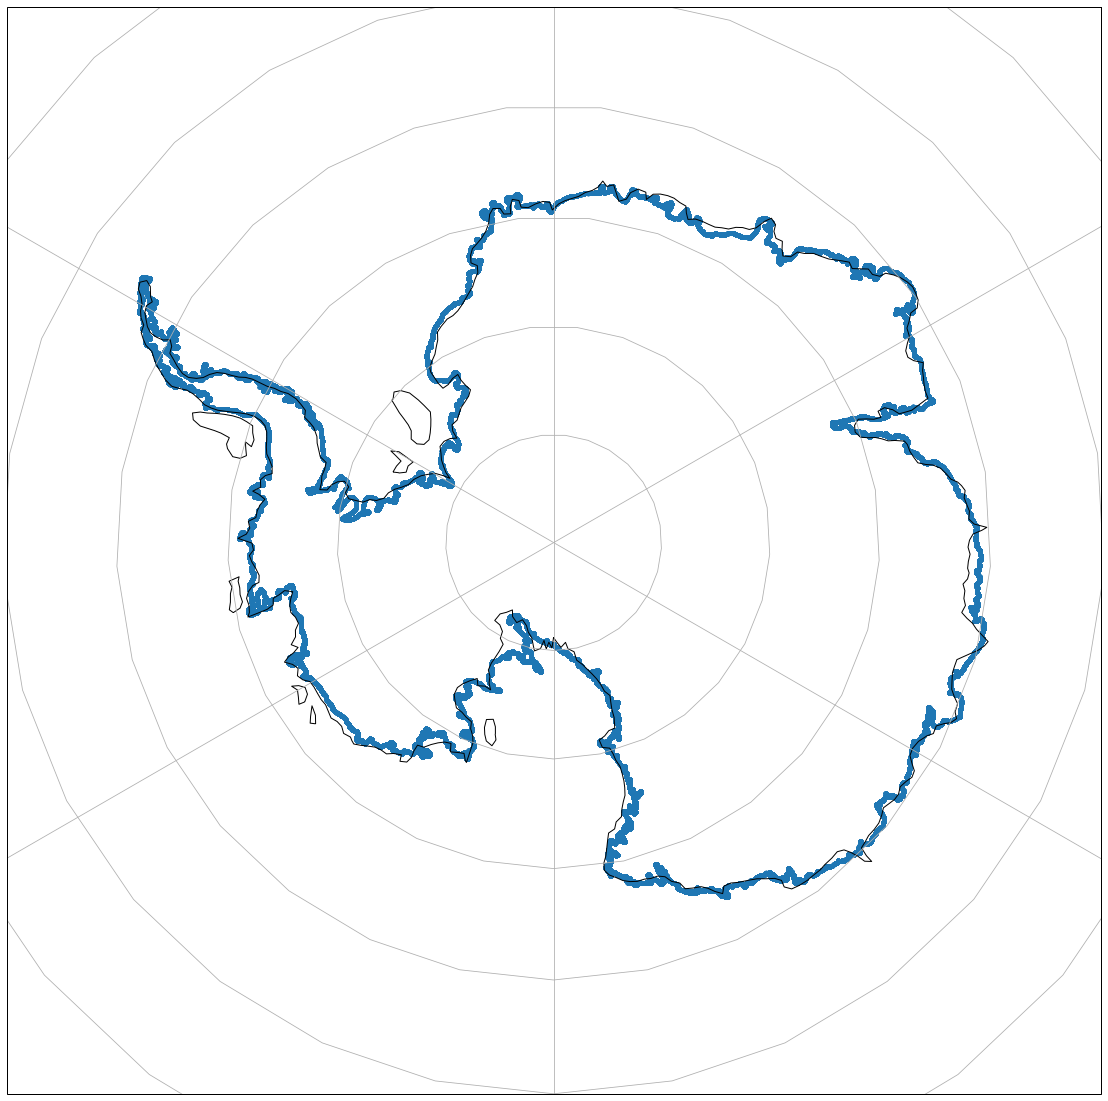

In [18]:
ax = plt.axes(projection=ccrs.SouthPolarStereo())


ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

ax.gridlines()

plt.rcParams['figure.figsize'] = [20, 20]



plt.scatter(line[:, 0], line[:, 1], s=1, linewidth=3, alpha=0.75, vmin=0, vmax=118, zorder=1, transform=ccrs.PlateCarree())

ax.coastlines()

plt.show()

In [17]:
lineSort = line[line[:, 0].argsort()]

lonLine = np.zeros([288])

print(lineSort[0:5, 0])

[0.00141274 0.00494428 0.00847592 0.0120075  0.0155373 ]


In [20]:
maxLon = 0.0
lonInd = 0

for i in range(860624):
    if lineSort[i, 0] > maxLon:
        lonLine[lonInd] = lineSort[i, 1]
        maxLon = maxLon + 1.25
        lonInd = lonInd + 1

In [22]:
lonsDistib = np.arange(0.0, 360.0, 1.25)

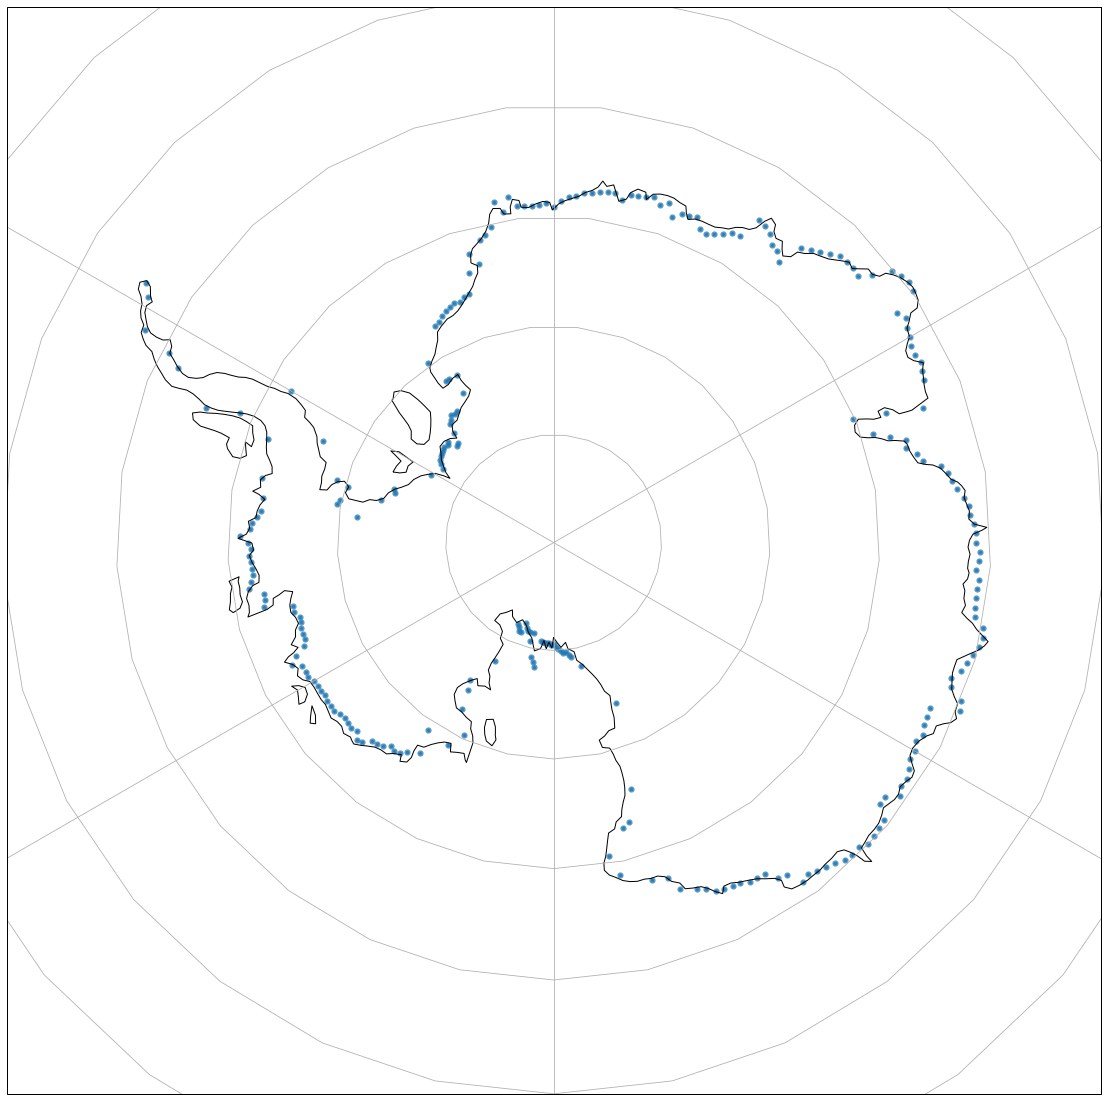

In [23]:
ax = plt.axes(projection=ccrs.SouthPolarStereo())


ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

ax.gridlines()

plt.rcParams['figure.figsize'] = [20, 20]



plt.scatter(lonsDistib, lonLine, s=10, linewidth=3, alpha=0.75, vmin=0, vmax=118, zorder=1, transform=ccrs.PlateCarree())

ax.coastlines()

plt.show()

In [24]:
np.savetxt("IceShelfMask.csv", lonLine)

In [27]:
mask = np.array(pd.read_csv('IceShelfMask.csv'))[:, 0]
print(mask.shape)

(288,)
